# 70. Models - Feature importance
## Contents
- Prerequisites
- Feature importance summary
- Feature importance specific document
---------------------------------------------------------
## Prerequisites

In [1]:
import time
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
import shap
from shap import TreeExplainer, Explanation
from shap.plots import waterfall
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
file_path = 'C:/Users/Koen.Janssen/OneDrive/Documents/TILBURG UNIVERSITY/Thesis/Data/'
parties = np.load('00_parties.npy')
documents = np.load('01_documents.npy', allow_pickle=True)
pd.set_option('display.max_colwidth', None)
shap.initjs()

------------------------------------------------
<br>
<br>
<br>


## Feature importance calculation

In [2]:
dur = time.time()
# -------------------------------------------------------------------------------------~----------------------------------------

for party in tqdm(parties, desc='Party loop'):                                         # for each party
    print(party)                                                                       # print party
    print("-----------------------------------------------------------------------")
    

    shap_url = file_path + f'60_feature_importance/{party}.joblib'
    if os.path.exists(shap_url):
        print("already calculated!\n")
        continue

    # load model
    # -------------------------------------------------------------------------------------~------------------------------------
    model_url = file_path + f"50_models/{party}.pkl"                                       # define model url
    loaded_model = joblib.load(model_url)                                                  # load model
    print("model loaded")

    # load training and validation data 
    # -------------------------------------------------------------------------------------~------------------------------------
    X_trainvalid_url = file_path + f"40_models_imbalanced/" + f"{party}_X_trainvalid.csv"
    print("trainvalid url defined")
    
    X_trainvalid = pd.read_csv(X_trainvalid_url)                                           # read X_trainvalid
    print("trainvalid loaded")
    
    X_trainvalid = X_trainvalid[X_trainvalid['document_id'].isin(documents)]
    print("trainvalid filtered on common documents")
    
    X_trainvalid = X_trainvalid.drop(columns=['source', 'text','stemming_id','document_id'])
    print("trainvalid removal of columns not used in training")   
    
    explainer = shap.TreeExplainer(loaded_model)
    print("shap model loaded")
    
    shap_values = explainer.shap_values(X_trainvalid)        
    print("shap values calculated")
    
    
    joblib.dump(shap_values, shap_url)
    print("shap values stored")
    print("ready! \n")
    
# -------------------------------------------------------------------------------------~----------------------------------------
print('\n---------------------------------------------------------------------------------------------------------------------')
print(f"Code duration: {round((time.time()  - dur),3)} seconds")    

Party loop: 100%|██████████| 18/18 [00:00<?, ?it/s]

50PLUS
-----------------------------------------------------------------------
already calculated!

CDA
-----------------------------------------------------------------------
already calculated!

CU
-----------------------------------------------------------------------
already calculated!

D66
-----------------------------------------------------------------------
already calculated!

DENK
-----------------------------------------------------------------------
already calculated!

FVD
-----------------------------------------------------------------------
already calculated!

GLPvdA
-----------------------------------------------------------------------
already calculated!

PVV
-----------------------------------------------------------------------
already calculated!

PvdD
-----------------------------------------------------------------------
already calculated!

SGP
-----------------------------------------------------------------------
already calculated!

SP
--------------------

------------------------------------------------
<br>
<br>
<br>


## Feature importance summary

Party loop:   0%|          | 0/18 [00:00<?, ?it/s]

50PLUS
-----------------------------------------------------------------------


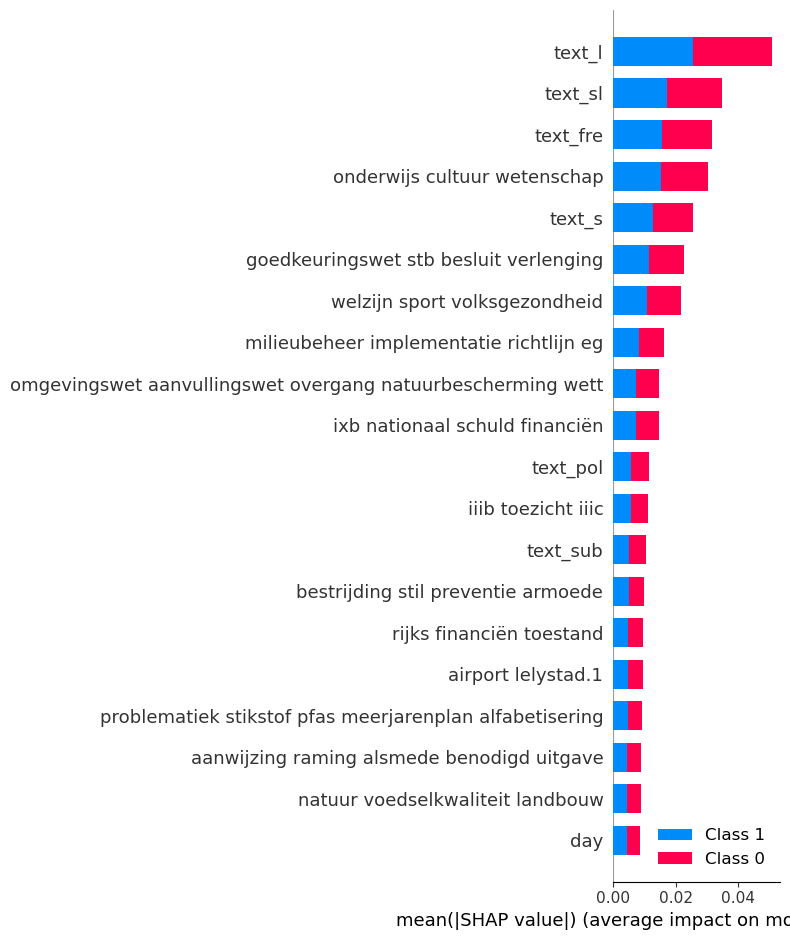

Party loop:   6%|▌         | 1/18 [00:01<00:25,  1.52s/it]

CDA
-----------------------------------------------------------------------


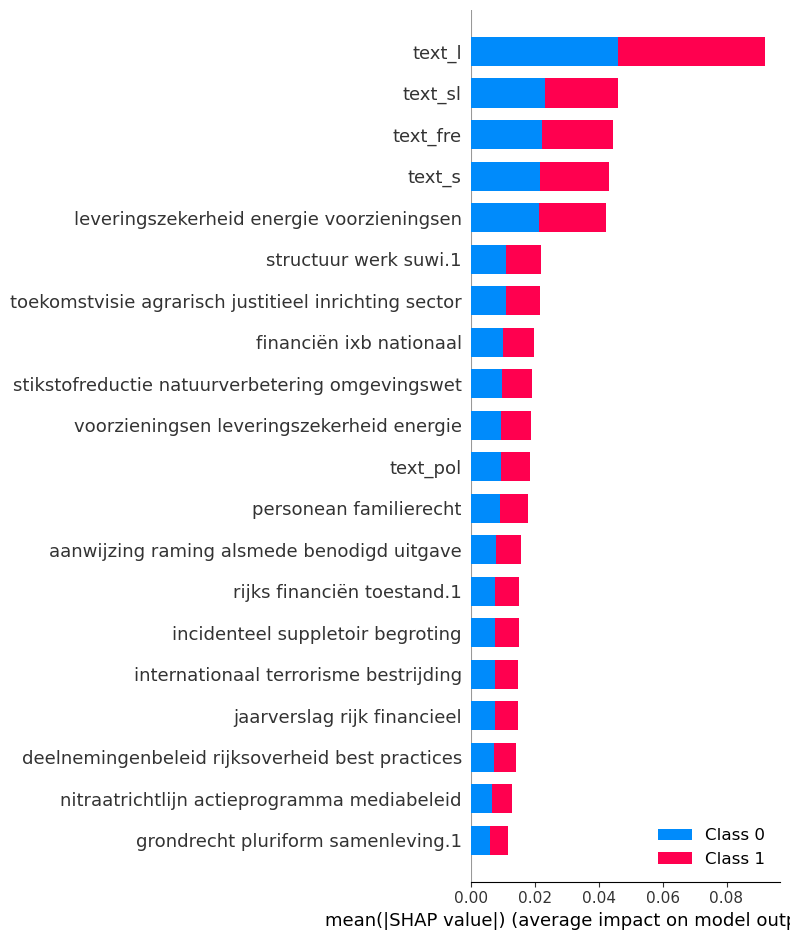

Party loop:  11%|█         | 2/18 [00:02<00:23,  1.49s/it]

CU
-----------------------------------------------------------------------


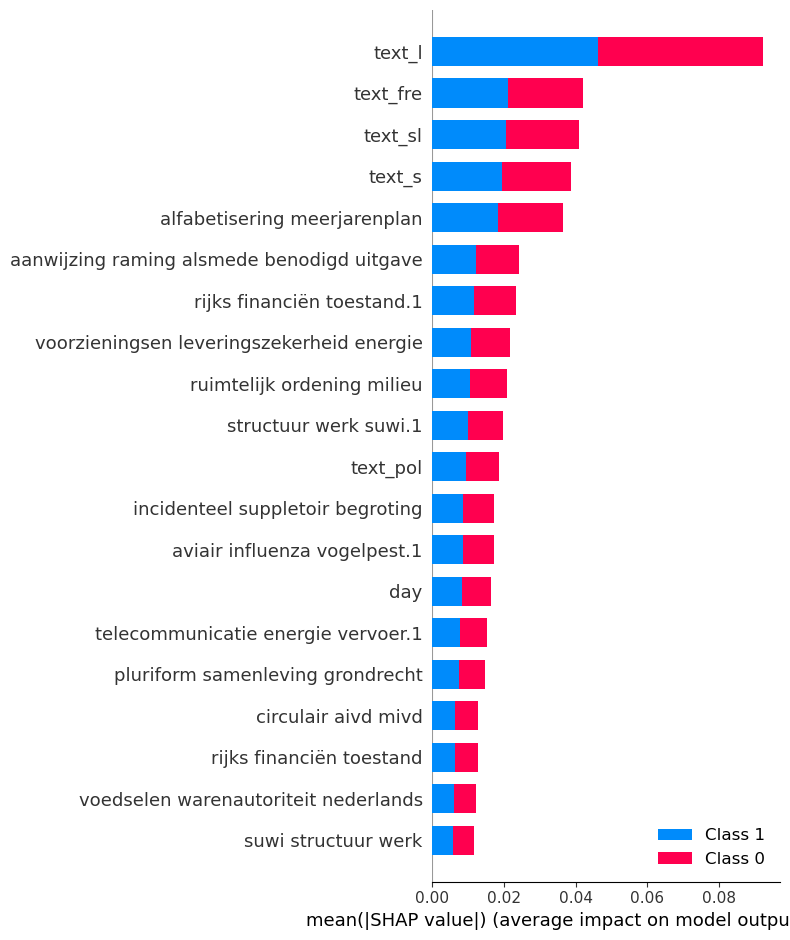

Party loop:  17%|█▋        | 3/18 [00:04<00:22,  1.50s/it]

D66
-----------------------------------------------------------------------


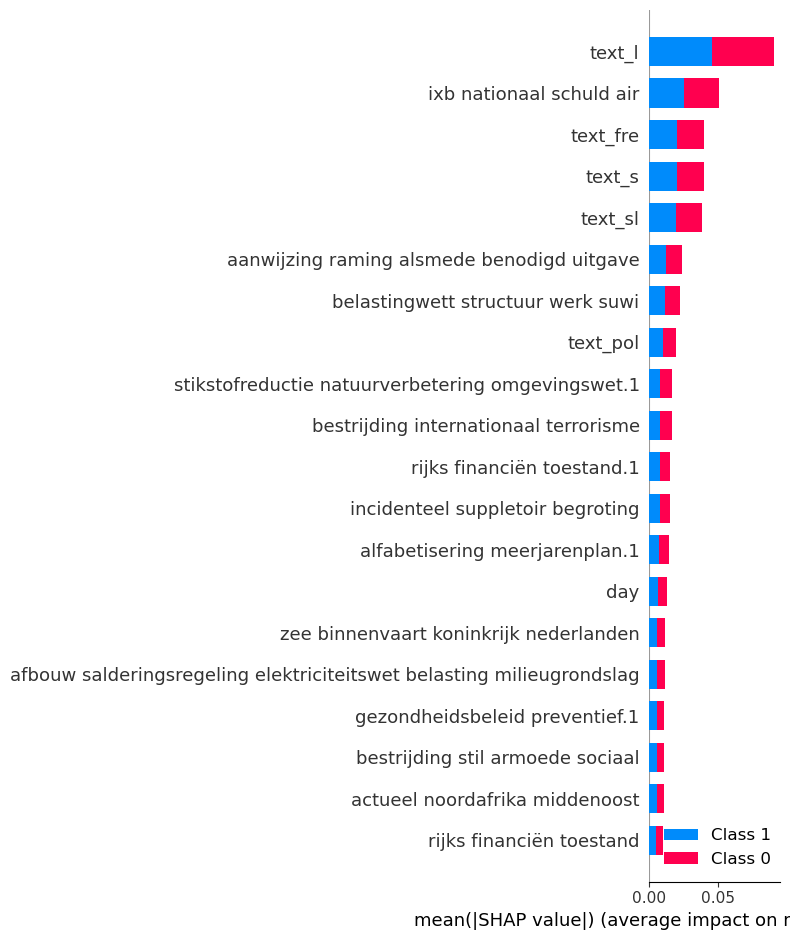

Party loop:  22%|██▏       | 4/18 [00:06<00:21,  1.53s/it]

DENK
-----------------------------------------------------------------------


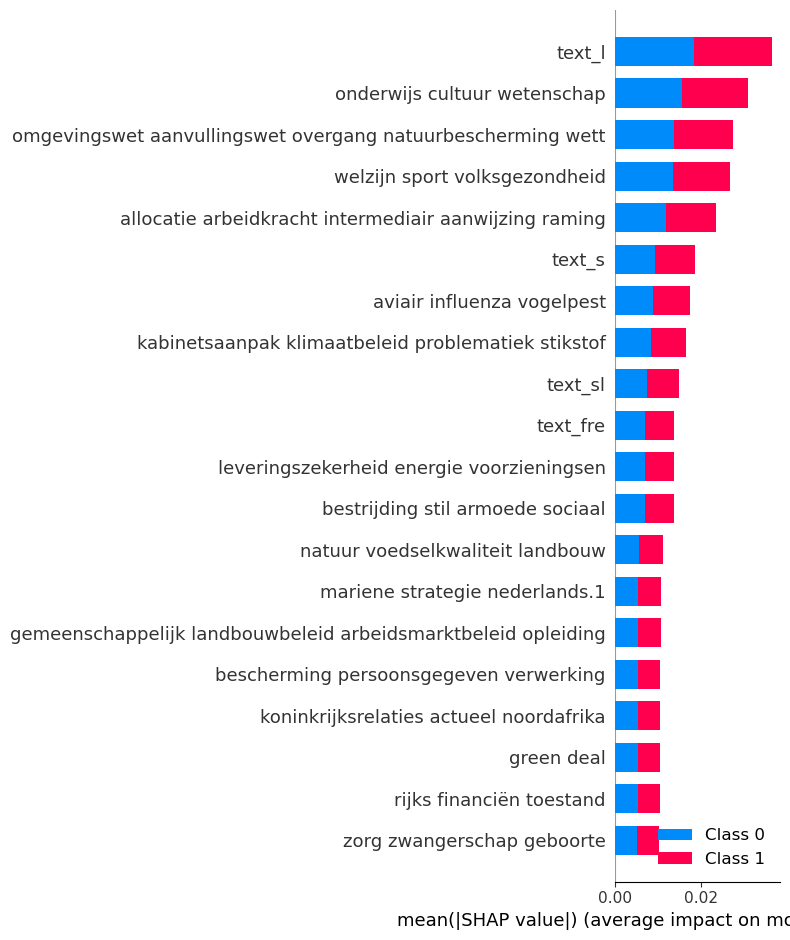

Party loop:  28%|██▊       | 5/18 [00:07<00:19,  1.53s/it]

FVD
-----------------------------------------------------------------------


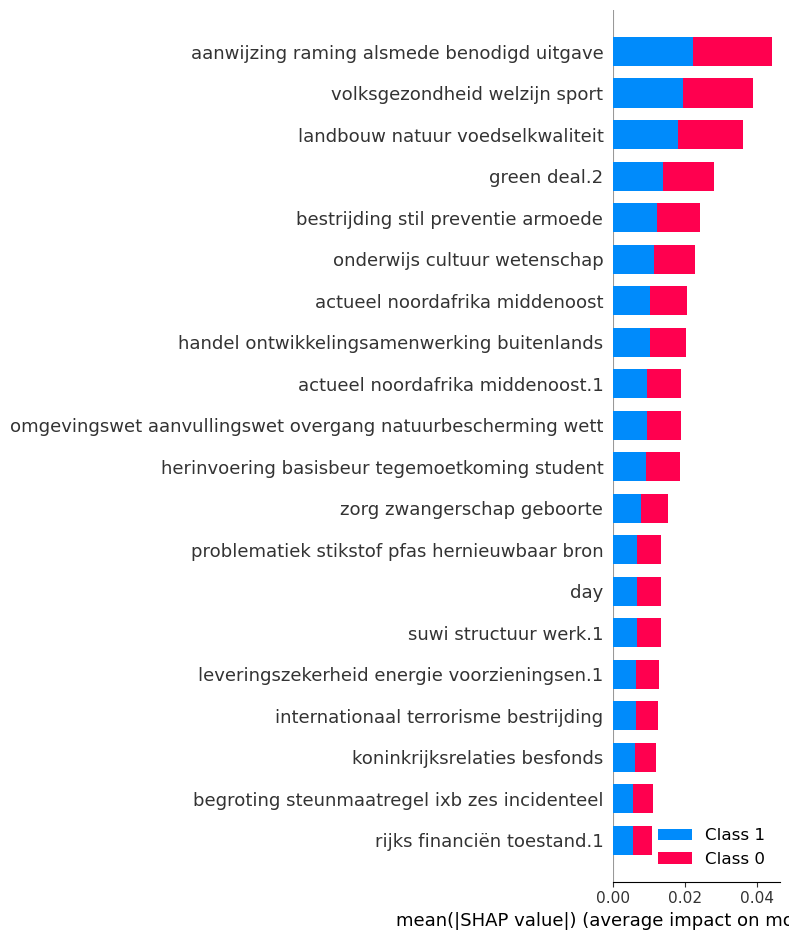

Party loop:  33%|███▎      | 6/18 [00:09<00:18,  1.54s/it]

GLPvdA
-----------------------------------------------------------------------


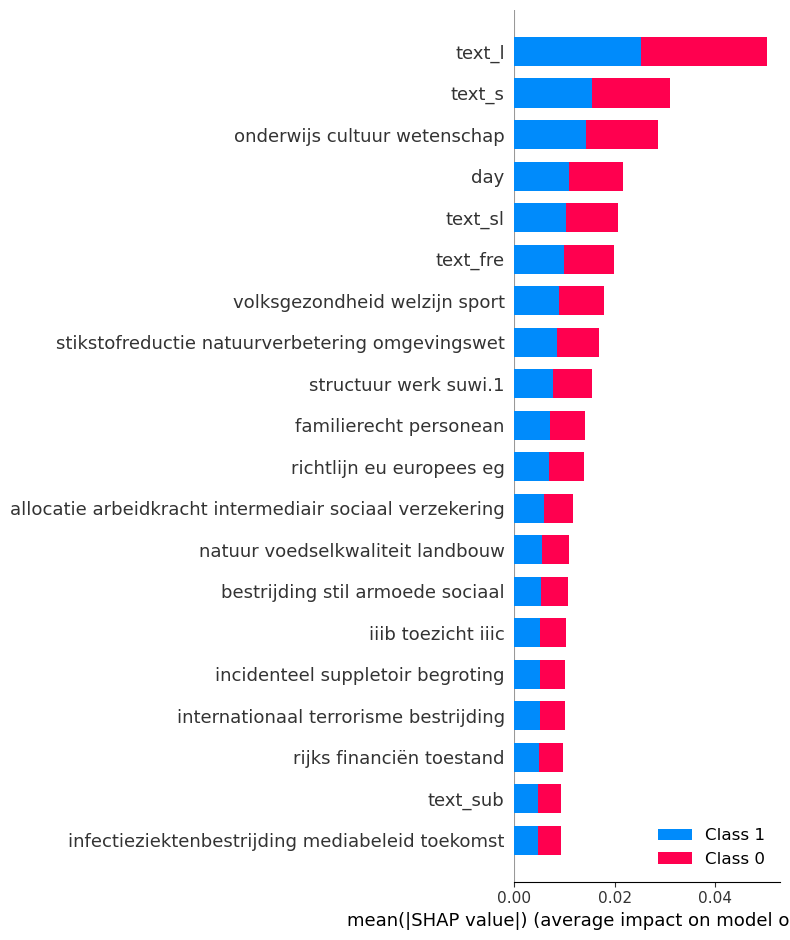

Party loop:  39%|███▉      | 7/18 [00:10<00:16,  1.55s/it]

PVV
-----------------------------------------------------------------------


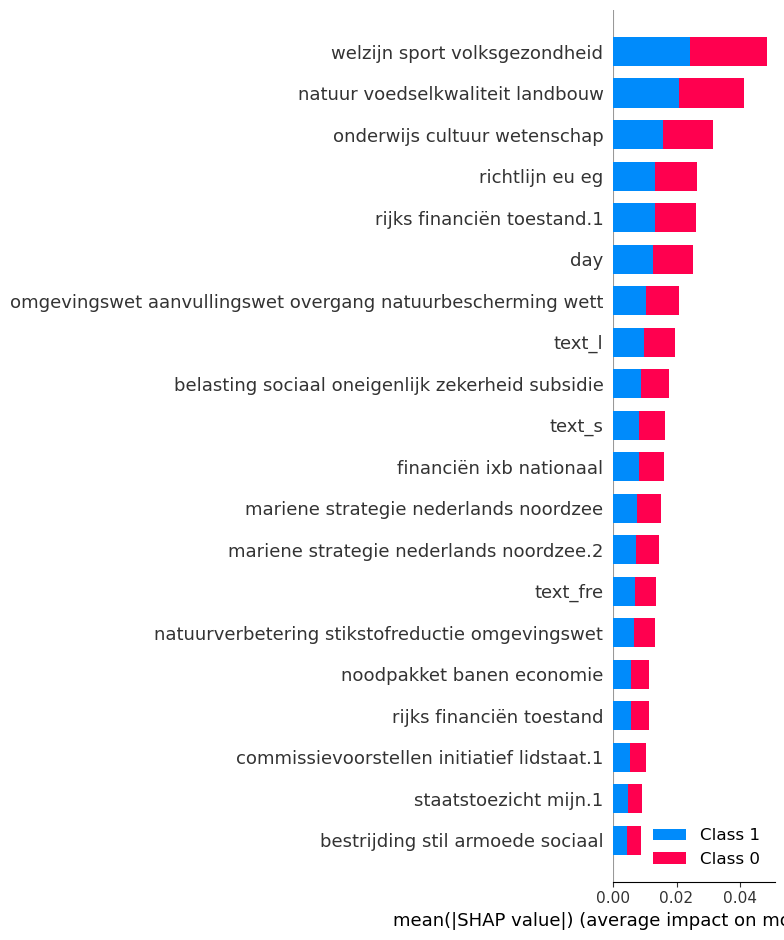

Party loop:  44%|████▍     | 8/18 [00:12<00:15,  1.55s/it]

PvdD
-----------------------------------------------------------------------


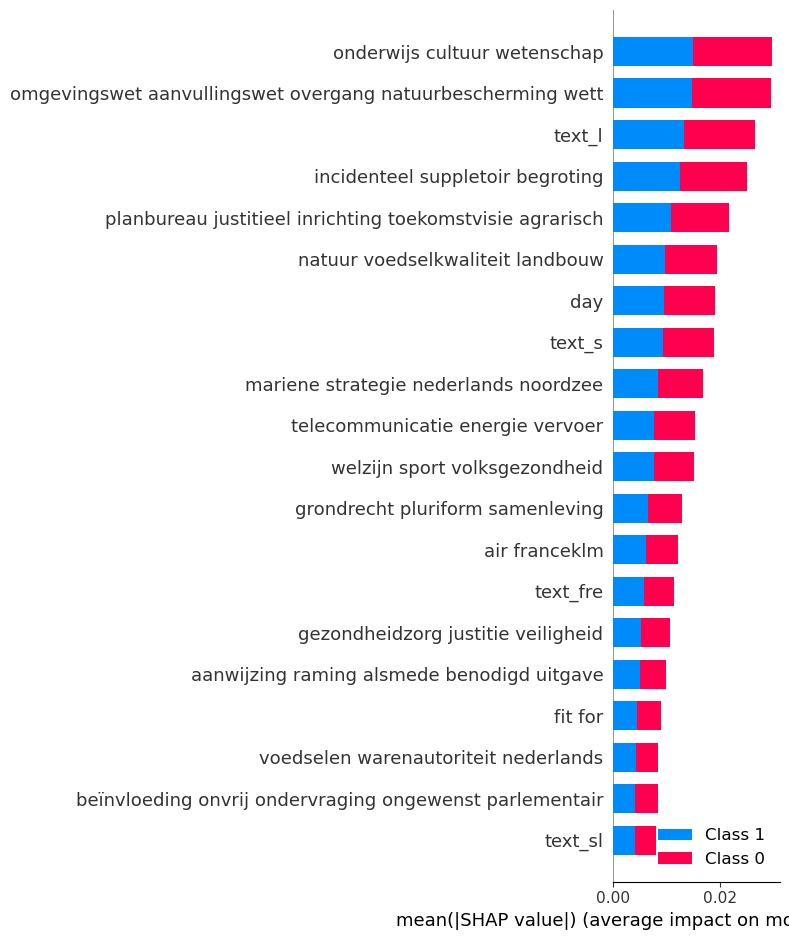

Party loop:  50%|█████     | 9/18 [00:13<00:14,  1.57s/it]

SGP
-----------------------------------------------------------------------


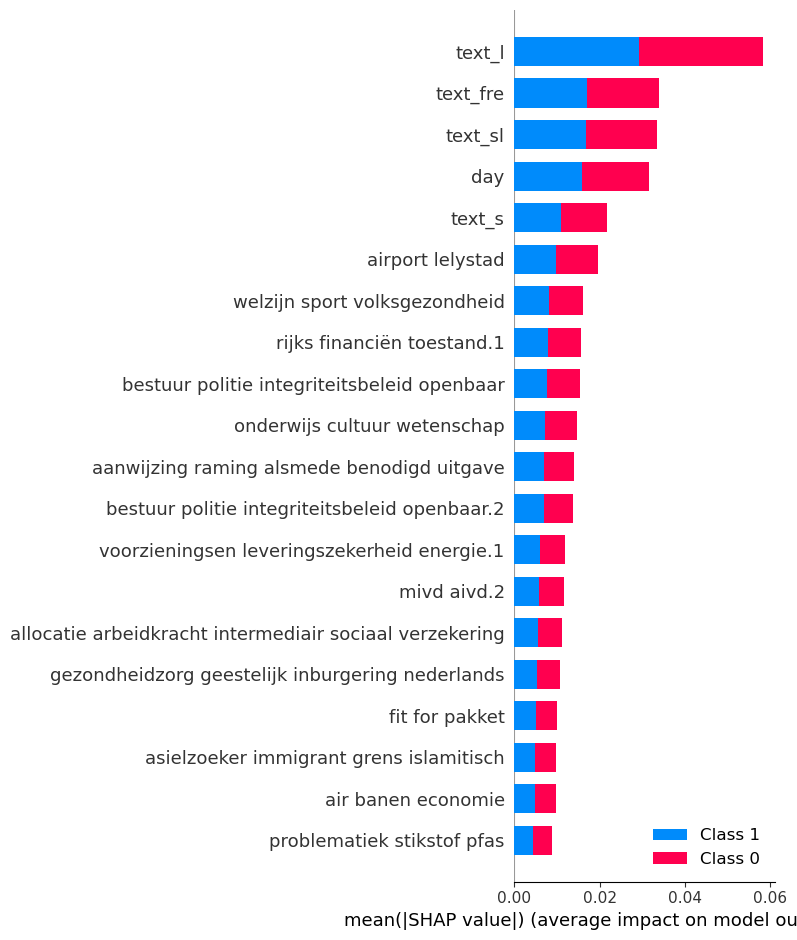

Party loop:  56%|█████▌    | 10/18 [00:15<00:12,  1.56s/it]

SP
-----------------------------------------------------------------------


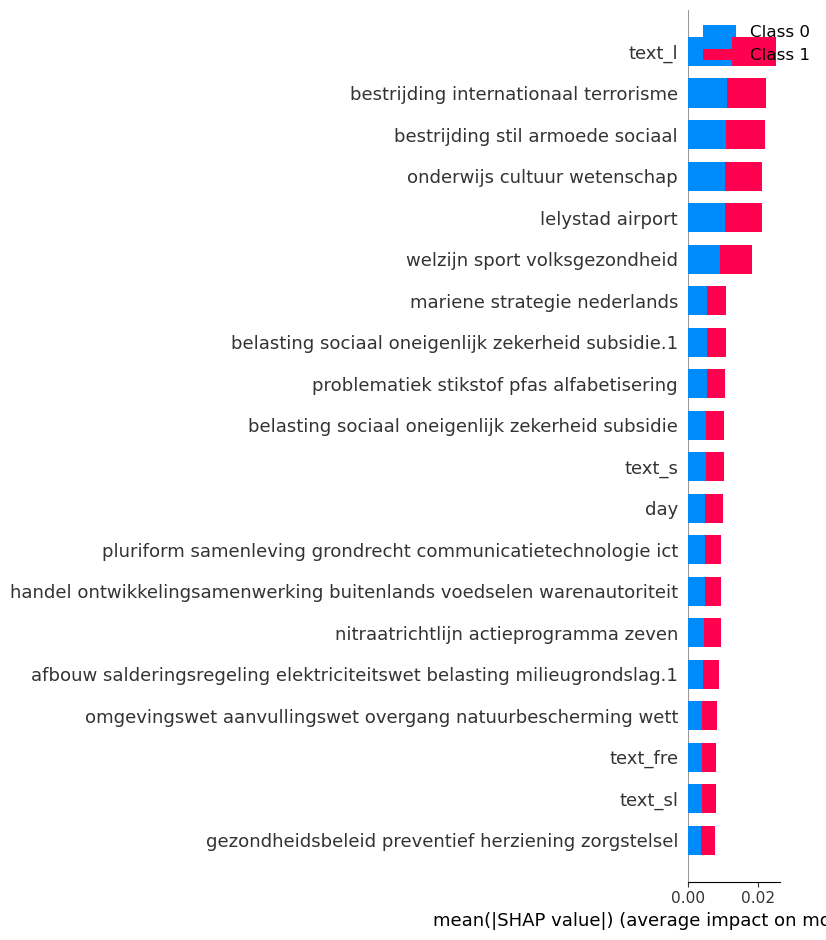

Party loop:  61%|██████    | 11/18 [00:17<00:10,  1.57s/it]

VVD
-----------------------------------------------------------------------


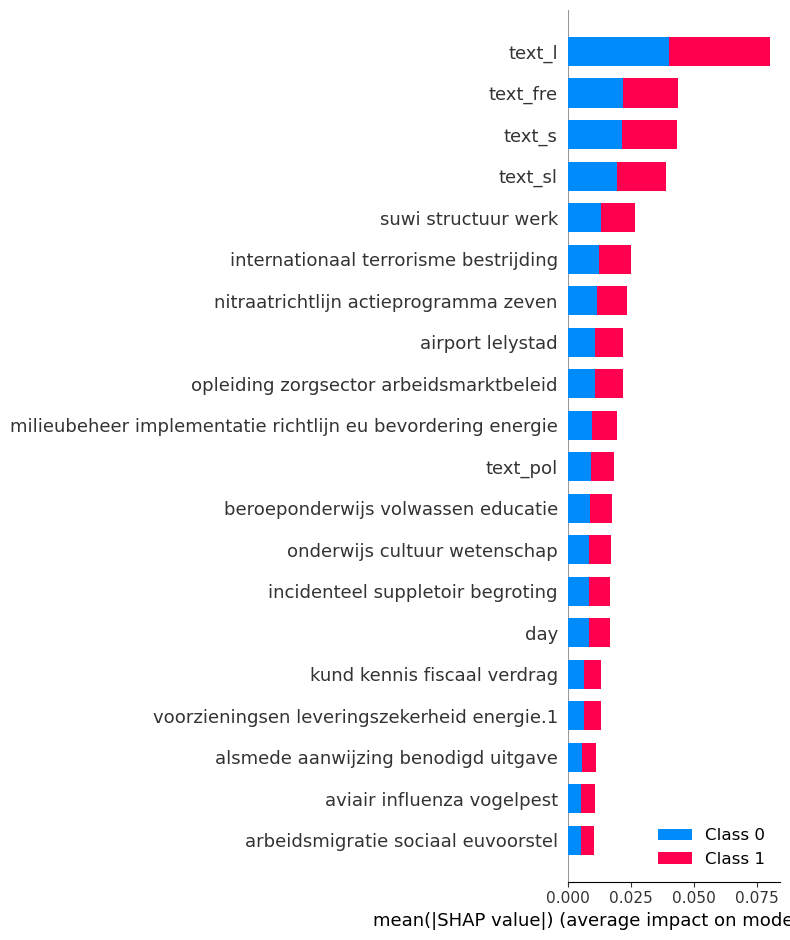

Party loop:  67%|██████▋   | 12/18 [00:18<00:09,  1.60s/it]

BVNL
-----------------------------------------------------------------------


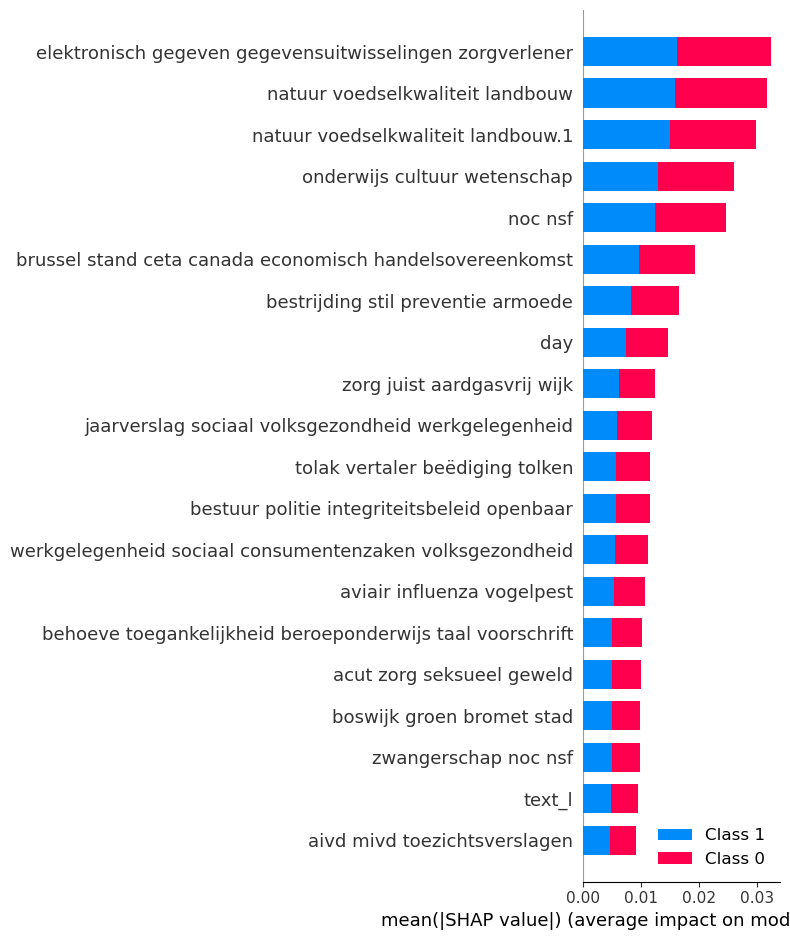

Party loop:  72%|███████▏  | 13/18 [00:19<00:07,  1.49s/it]

BBB
-----------------------------------------------------------------------


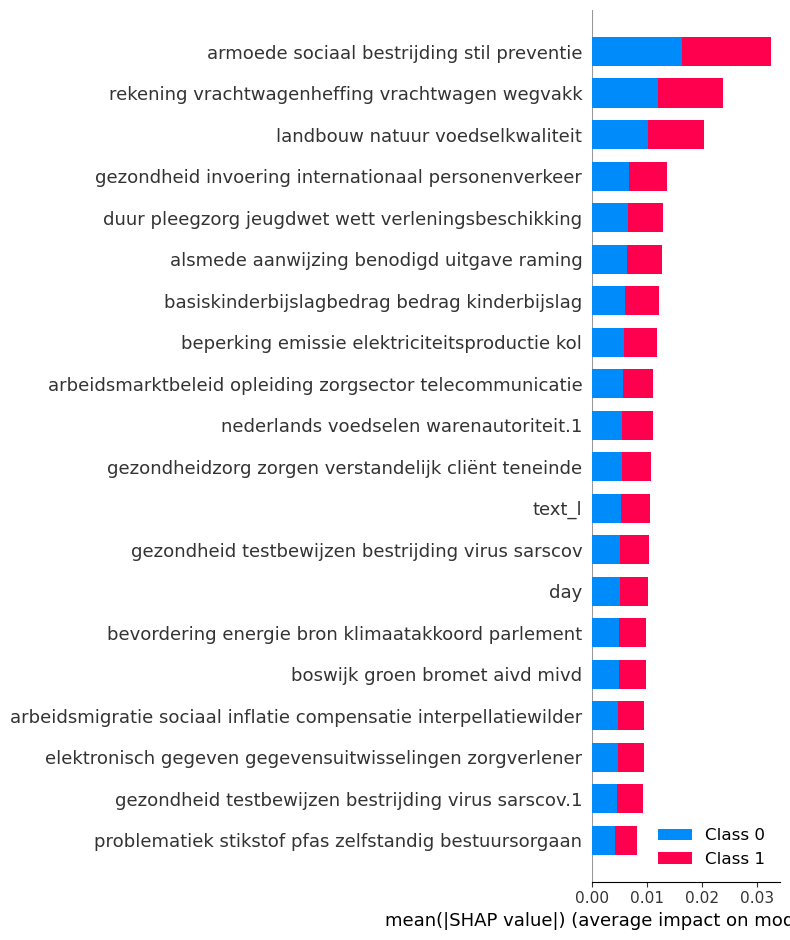

Party loop:  78%|███████▊  | 14/18 [00:20<00:05,  1.36s/it]

BIJ1
-----------------------------------------------------------------------


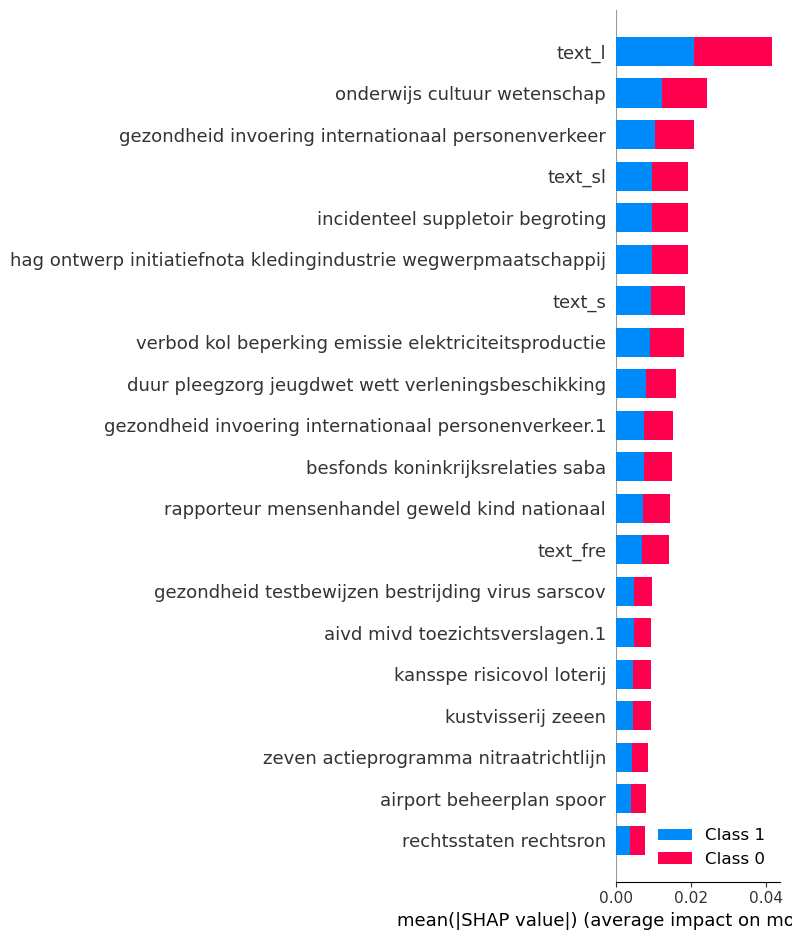

Party loop:  83%|████████▎ | 15/18 [00:21<00:03,  1.23s/it]

JA21
-----------------------------------------------------------------------


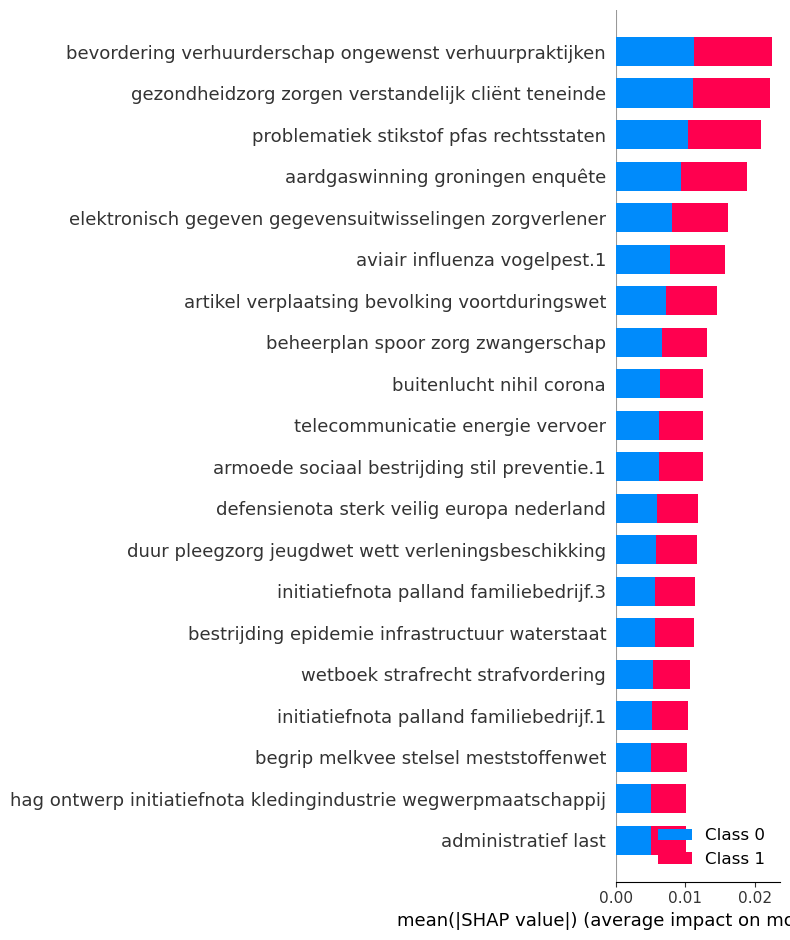

Party loop:  89%|████████▉ | 16/18 [00:23<00:02,  1.19s/it]

NSC
-----------------------------------------------------------------------


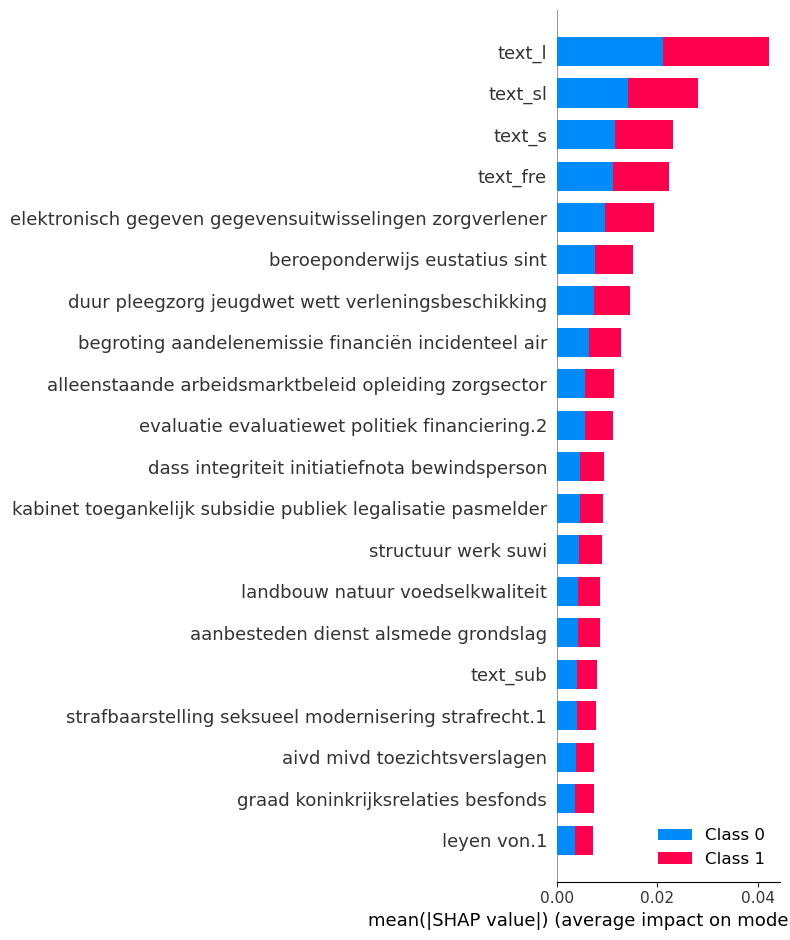

Party loop:  94%|█████████▍| 17/18 [00:23<00:01,  1.10s/it]

Volt
-----------------------------------------------------------------------


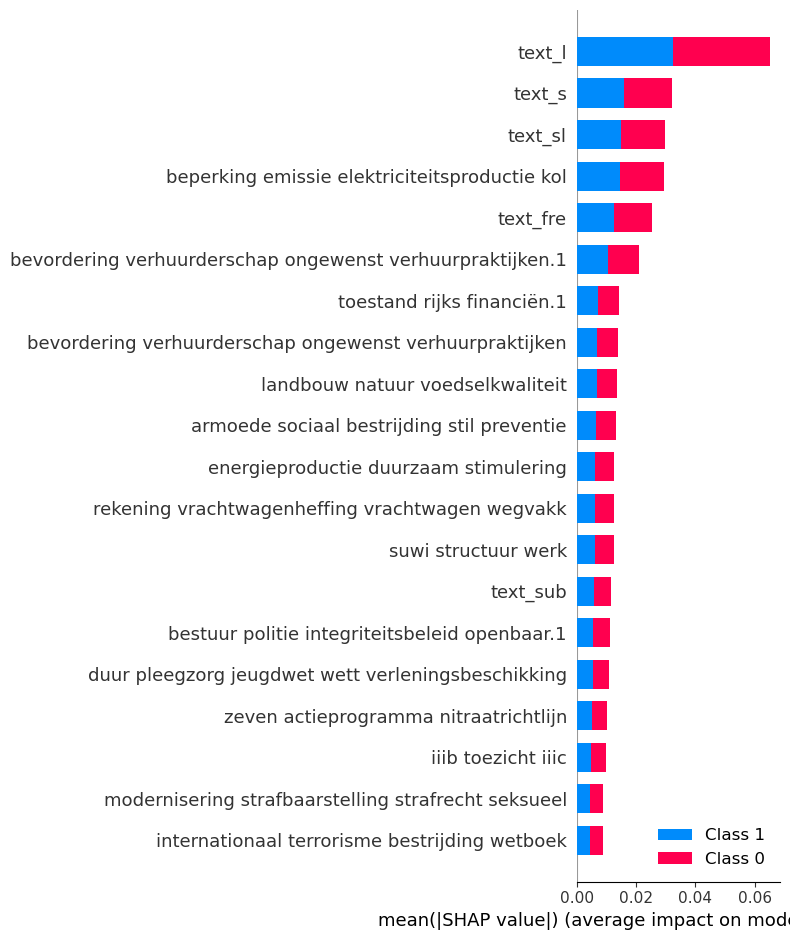

Party loop: 100%|██████████| 18/18 [00:24<00:00,  1.38s/it]


---------------------------------------------------------------------------------------------------------------------
Code duration: 24.871 seconds


In [6]:
dur = time.time()
# -------------------------------------------------------------------------------------~----------------------------------------

for party in tqdm(parties, desc='Party loop'):                                         # for each party
    print(party)                                                                       # print party
    print("-----------------------------------------------------------------------")

    # load model
    # -------------------------------------------------------------------------
    shap_url = file_path + f'60_feature_importance/{party}.joblib'
    shap_values = joblib.load(shap_url)
    
    # load training and validation data 
    # -------------------------------------------------------------------------------------~------------------------------------
    X_trainvalid_url = file_path + f"40_models_imbalanced/" + f"{party}_X_trainvalid.csv"
    X_trainvalid = pd.read_csv(X_trainvalid_url)                                       # read X_trainvalid
    X_trainvalid = X_trainvalid[X_trainvalid['document_id'].isin(documents)]
    X_trainvalid = X_trainvalid.drop(columns=['source', 'text','stemming_id','document_id'])
    
      
    # Visualize
    # -------------------------------------------------------------------------------------~------------------------------------
    shap.summary_plot(shap_values, X_trainvalid)
    
# -------------------------------------------------------------------------------------~----------------------------------------
print('\n---------------------------------------------------------------------------------------------------------------------')
print(f"Code duration: {round((time.time()  - dur),3)} seconds")    

------------------------------------------------
<br>
<br>
<br>


## Feature importance common documents

In [4]:
dur = time.time()
# -------------------------------------------------------------------------------------~----------------------------------------
documents = []
iteration = 0

documents = set()  # Initialize as a set instead of a list
iteration = 0

for party in parties:  # for each party
    # load training and validation data 
    # -------------------------------------------------------------------------------------~------------------------------------
    X_trainvalid_url = file_path + f"40_models_imbalanced/" + f"{party}_X_trainvalid.csv"  # define x_trainvalid_url
    X_trainvalid = pd.read_csv(X_trainvalid_url)                                           # read X_trainvalid
    
    if not documents:  # If documents set is empty, initialize it with the document IDs from the first party
        documents.update(set(X_trainvalid['document_id']))
    else:
        documents.intersection_update(set(X_trainvalid['document_id']))  # Update documents set with common document IDs

np.save('02_documents.npy', list(documents))  # Save the list of common document IDs
print("complete!")
print(len(documents))


complete!
107


------------------------------------------------
<br>
<br>
<br>


## Feature importance specific document

In [7]:
dur = time.time()
# -------------------------------------------------------------------------------------~----------------------------------------
documents = np.load('02_documents.npy', allow_pickle=True)
document_index = 10
iteration = 0

for party in parties:                                                                  # for each party
   
    # load model
    # -------------------------------------------------------------------------------------~------------------------------------
    model_url = file_path + f"50_models/{party}.pkl"                                       # define model url
    loaded_model = joblib.load(model_url)                                                  # load model
    
    # load shap
    # -------------------------------------------------------------------------------------~------------------------------------
    shap_url = file_path + f'60_feature_importance/{party}.joblib'                         # define shap_url      
    shap_values = joblib.load(shap_url)                                                    # define shap_values
    shap_values_positive = shap_values[1]                                                  # define shap_values_positive
    avg_shap_values_positive = np.mean(shap_values_positive, axis=0)                       # define avg_shap_values_positive

    # load training and validation data 
    # -------------------------------------------------------------------------------------~------------------------------------
    X_trainvalid_url = file_path + f"40_models_imbalanced/" + f"{party}_X_trainvalid.csv"  # define x_trainvalid_url
    X_trainvalid = pd.read_csv(X_trainvalid_url)                                           # read X_trainvalid
    y_trainvalid_url = file_path + f"40_models_imbalanced/" + f"{party}_y_trainvalid.csv"  # define y_trainvalid_url
    y_trainvalid = pd.read_csv(y_trainvalid_url)                                           # read y_trainvalid
    
    chosen_document = [documents[document_index]]
    X_trainvalid = X_trainvalid[X_trainvalid['document_id'].isin(chosen_document)]         # filter x_trainvalid common docs

    chosen_index = X_trainvalid.index[0]
    label = y_trainvalid.loc[chosen_index]

    
    if iteration == 0:
        print(f"document loaded {chosen_document} \n")
        print("document text:")
        print(X_trainvalid['source'])
        print("\n")

    print(f"{party}, voted: {label[0]}")                                                   # print party
    # print(f"document loaded {chosen_document} \n")
    # print("document text:")
    # print(X_trainvalid['source'])
    # print("\n")       
    
    X_trainvalid = X_trainvalid.drop(columns=['source', 'text','stemming_id','document_id'])
    explainer = shap.TreeExplainer(loaded_model)
    shap_values = explainer.shap_values(X_trainvalid)

    display(shap.force_plot(explainer.expected_value[1], shap_values[1], X_trainvalid))
    
    iteration += 1
    

# -------------------------------------------------------------------------------------~----------------------------------------
print('\n---------------------------------------------------------------------------------------------------------------------')
print(f"Code duration: {round((time.time()  - dur),3)} seconds")    

document loaded ['d0ce652e-d4b0-4728-abbb-ef09ca8fa5c4'] 

document text:
1654    Acute zorg Motie van de leden Drost en Tielen over aan de ROAZ'en vragen ook aandacht te besteden aan het behoud van personeel voor de zorg als acute zorg sluit  Tweede Kamer der Staten-Generaal 2 Vergaderjaar 2022–2023  29 247 Acute zorg  Nr. 419  MOTIE VAN DE LEDEN DROST EN TIELEN  Voorgesteld 22 juni 2023  De Kamer,  gehoord de beraadslaging,  overwegende dat voor verzorgend en ondersteunend personeel werken  op grotere afstand van huis minder vanzelfsprekend is dan voor artsen;  overwegende dat het gezien de personeelstekorten in de zorg belangrijk is  dat bij het sluiten van een afdeling het personeel behouden blijft voor de  zorg;  verzoekt de regering om aan de ROAZ’en te vragen om als acute zorg sluit  ook aandacht te besteden aan het behoud van personeel voor de zorg, en  om bij het opstellen van nieuwe normen van toegankelijkheid en kwaliteit  te toetsen wat de gevolgen zijn voor het behoud van 

CDA, voted: 1


CU, voted: 1


D66, voted: 1


DENK, voted: 1


FVD, voted: 1


GLPvdA, voted: 1


PVV, voted: 1


PvdD, voted: 0


SGP, voted: 1


SP, voted: 0


VVD, voted: 1


BVNL, voted: 1


BBB, voted: 1


BIJ1, voted: 1


JA21, voted: 1


NSC, voted: 1


Volt, voted: 1



---------------------------------------------------------------------------------------------------------------------
Code duration: 38.125 seconds
